# Medford High School Workshop on Image Representations

## GreyScale Images as Matrices

A grayscale image is simply a matrix of numbers, where each number represents a pixel's brightness.

- 0 (Black) → No light (darkest pixel)

- 255 (White) → Full brightness (brightest pixel)

- Intermediate values (e.g., 128) → Shades of gray

Grayscale images are just 2D matrices where each pixel represents an intensity value (0-255 for 8-bit images). This is the kind of matrix you likely have learned to do some operations on and work with, and they are very intuitive for small scale applications. First, we will explore grayscale images since most of the CubeSAT team's applications will be predominantly grayscale. Then, we will explore briefly how Red Blue Green (RGB) images work in their multi-dimensional matrix format.

The following block of code has our import statements, which lets us bring in the code that other people have written and packaged up for our use so that we do not need to build everything from scratch. This saves us time, obviously, but a great programmer knows that using well tested solutions instead of doing it yourself also often saves bugs too.

In [28]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

### Step One: Define a Small Grayscale Image Matrix and the Sobel Filters

#### How does Sobel X Work?

This kernel detects vertical edges by measuring horizontal intensity changes (left to right). It highlights areas where brightness shifts from dark to light or light to dark horizontally. If an image has a sharp vertical boundary, this filter will produce strong values.

Example: A wall or the side of an object in space will have a strong response.

#### How does Sobel Y Work?

This kernel detects horizontal edges by measuring vertical intensity changes (top to bottom). It highlights areas where brightness shifts from dark to light or light to dark vertically. If an image has a sharp horizontal boundary, this filter will produce strong values.

Example: The top of a spacecraft or the horizon of a planet will have a strong response.

In [29]:
# Define a simple 5x5 image (grayscale)
# 0 is taken as black, 128 is taken as gray (255 is taken as white in RGB)
image = np.array([
    [255, 0, 0, 0, 0],
    [0, 128, 128, 128, 0],
    [0, 128, 0, 128, 0],
    [0, 128, 128, 128, 0],
    [0, 0, 255, 0, 0]
])

# Sobel filters
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

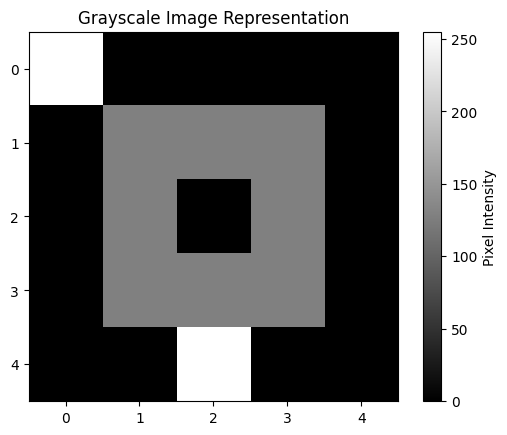

In [30]:
# Display the image using matplotlib
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.colorbar(label="Pixel Intensity")
plt.title("Grayscale Image Representation")
plt.show()

As we can see from our image, because the matrix representing the piece of space debris is so small (only 5 x 5) the resolution is very small. This is not exactly the high fidelity we have come to expect in our video games and in our high resolution TV screens. For the purposes of today's workshop and for the purposes of being able to compute arithmetic by hand to verify it all, the resolution was kept low. Note that in reality, this would be "upscaled" to a lot of pixels to give us that greater fidelity.

### Step Two: Apply the Sobel Filter to the Image

We perform convolution by sliding the Sobel filter over the image, multiplying corresponding values, and summing them up. The center of the filter is placed over each pixel (except edges, which are ignored to keep the result the same size). Each kernel is "slid" over the image, performing a convolution operation that multiplies pixel values and sums them up. The resulting values create two separate images: $G_x$ and $G_y$.  
​To get the final edge-detected image, we combine both using the gradient magnitude formula: $G=\sqrt{G_x^2+G_y^2}$

For this example, we will compute the Sobel Filter example convolution at the center pixel (row 2, column 2).

NOTE: programming convention has us start counting at 0 not 1! That's why it's at position (2,2) instead of (3,3).

In [31]:
# Apply Sobel filters using convolution
Gx = scipy.ndimage.convolve(image.astype(float), sobel_x)
Gy = scipy.ndimage.convolve(image.astype(float), sobel_y)

# Compute gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)

# Normalize for display
G = (G / np.max(G)) * 255

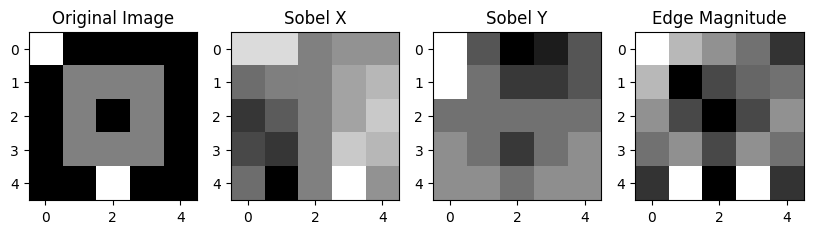

In [32]:
# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(Gx, cmap='gray')
plt.title("Sobel X")

plt.subplot(1, 4, 3)
plt.imshow(Gy, cmap='gray')
plt.title("Sobel Y")

plt.subplot(1, 4, 4)
plt.imshow(G, cmap='gray')
plt.title("Edge Magnitude")

plt.show()


### Apply This to a Debris Photo!

Now let's try to apply this technique to a non toy image!

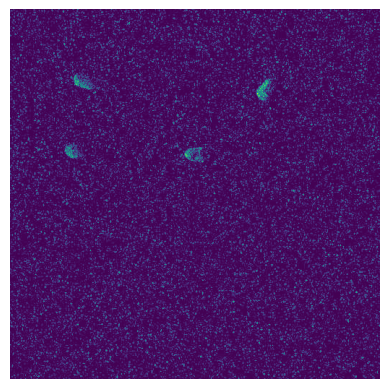

Image has been successfully loaded


In [33]:
from PIL import Image

image = Image.open("40.jpg").convert('L')
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()
print("Image has been successfully loaded")

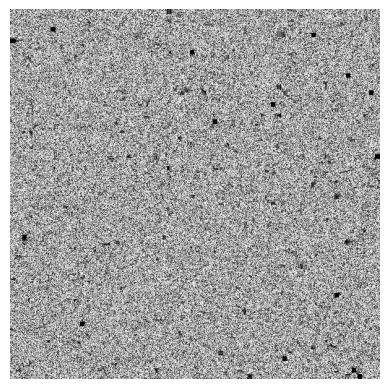

Sobel filter applied successfully


In [34]:
from scipy.ndimage import convolve

gradient_x = convolve(image, sobel_x)
gradient_y = convolve(image, sobel_y)

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the resulting edge magnitude image
plt.imshow(magnitude, cmap='gray')
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()

print("Sobel filter applied successfully")

### Apply this to a non-debris image!

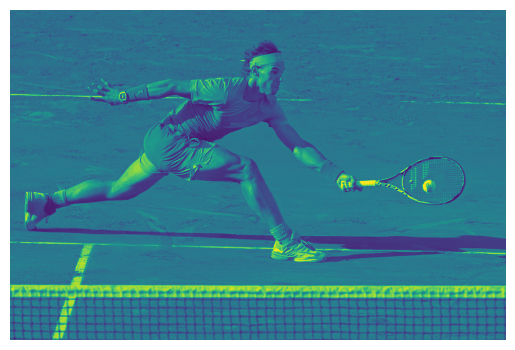

Image has been successfully loaded


In [35]:
image = Image.open("Nadal.jpg").convert('L')
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()
print("Image has been successfully loaded")

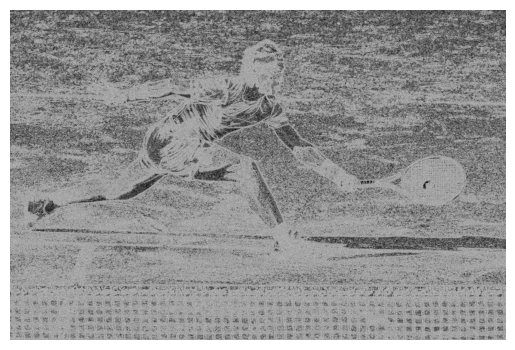

Sobel filter applied successfully


In [36]:
gradient_x = convolve(image, sobel_x)
gradient_y = convolve(image, sobel_y)

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the resulting edge magnitude image
plt.imshow(magnitude, cmap='gray')
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()

print("Sobel filter applied successfully")

### Step Three: Model Usage

If the filter determines a high likelihood of edges in multiple regions of the image, indicating there might be multiple instances of space debris, then we can use a machine learning model on the original image to detect where those objects are. Why do we bother to run this filter? Well, ML models are not fast at inference, which is the task we train them for. Especially in space, we have limited computational power. Our computer is less powerful than the cell phone in your pocket. So, we run the filter to weed out images it's not worth running the model on that might have nothing in them but dark space.

## RGB Images as Matrices

When you look at an image on your screen, it's made up of tiny dots called pixels. Each pixel has a color, and how we store and work with colors can make things a bit more complicated.

A grayscale image only has one number for each pixel, which represents how light or dark that pixel is. Think of it like a single number for each pixel in a matrix, where 0 could represent black, and 255 (in an 8-bit image) could represent white. The middle values represent varying shades of gray.

An RGB image, however, is more complex. RGB stands for Red, Green, Blue, which are the three primary colors of light. Each pixel in an RGB image actually has three numbers—one for red, one for green, and one for blue. These numbers tell you how much of each color is mixed together to create the final color of that pixel. So, each RGB pixel is like a tiny matrix with three values instead of one.

For example, if you have an RGB pixel represented as [255, 0, 0], it means the pixel is fully red with no green or blue. A pixel like [0, 255, 0] would be fully green, and [0, 0, 255] would be fully blue. Together, you can combine these colors to create every color you see on the screen.

Since an RGB image has three times as many values per pixel as a grayscale image, it’s more complex to work with. Each pixel becomes a small matrix of three numbers, and if you want to manipulate the entire image, you need to deal with a matrix of matrices (one for each pixel).

So, you need to manage more data and do more calculations if you want to process or analyze an RGB image. This becomes really hard to do for any one mathmetician, and that's why automation is even more important with color! The extra dimension (channel) of color makes RGB images more complicated, but it also allows for a much richer variety of colors!

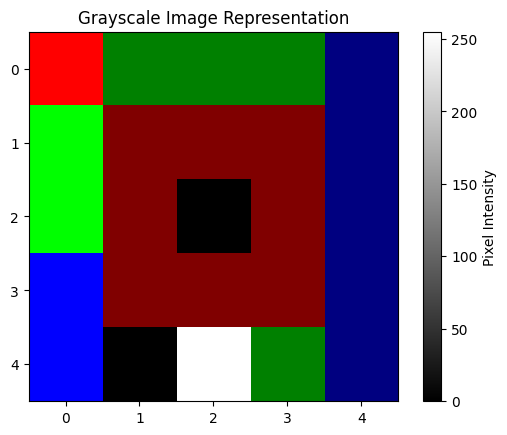

In [37]:
image = np.array([
    [(255, 0, 0), (0,128,0), (0,128,0), (0,128,0), (0,0,128)],
    [(0,255,0), (128, 0, 0), (128, 0, 0), (128, 0, 0), (0,0,128)],
    [(0,255,0), (128, 0, 0), (0,0,0), (128, 0, 0), (0,0,128)],
    [(0,0,255), (128, 0, 0), (128, 0, 0), (128, 0, 0), (0,0,128)],
    [(0,0,255), (0,0,0), (255, 255, 255), (0,128,0), (0,0,128)]
])
# Display the image using matplotlib
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.colorbar(label="Pixel Intensity")
plt.title("Grayscale Image Representation")
plt.show()